In [2]:
import pandas as pd
import numpy as np
import pdb 
from datetime import datetime, timedelta
from dis import dis
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("prepped_data_with_lpips_similarity.csv")

In [ ]:
import torch
import cv2

import vgg_loss

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

crit_vgg = vgg_loss.VGGLoss().to(device)

def get_similarity(image1, image2):

    img1 = cv2.imread(image1) / 255.0
    img2 = cv2.imread(image2) / 255.0
    img1 = cv2.resize(img1, (256,256))
    img2 = cv2.resize(img2, (256,256))
    img1 = torch.from_numpy(img1).to(device)
    img2 = torch.from_numpy(img2).to(device)
    img1 = img1.permute(2,0,1).unsqueeze(0).float()
    img2 = img2.permute(2,0,1).unsqueeze(0).float()

    loss = crit_vgg(img1, img2, target_is_features=False)
    return loss.item()

In [ ]:
a = get_similarity('../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0031663.jpeg', '../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0032596.jpeg')
# import os
# print(os.path.isfile('/Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0031663.jpeg'))
# a = cv2.imread('../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0031663.jpeg')
# b = cv2.imread('../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0031663.jpeg')

In [ ]:
x = get_similarity('../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0026165.jpeg', '../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/ISIC_0032596.jpeg')

In [ ]:
data['origin'] = data['origin'].str.replace('.jpg', '.jpeg')
data['shifted_origin'] = data['origin'].shift(periods = 1)
data['origin_file'] = '../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/' + data['origin']
data['shifted_origin_file'] = '../../../Datasets/ISIC-Archive-Downloader/Data/img/Images/' + data['shifted_origin']
data = data.dropna()
data['similarity'] = data.apply(lambda row: get_similarity(row['origin_file'], row['shifted_origin_file']), axis = 1)
data.head()
# data['similarity_bins'] = pd.cut(x=similarity, bins=np.arange(-200,210,10))
# data_per_bin = data.groupby(['similarity_bins']).mean()

In [6]:
similarity_1forward_max = data['similarity_1forward'].max()
similarity_1forward_min = data['similarity_1forward'].min()
print(similarity_1forward_max,similarity_1forward_min)

similarity_1back_max = data['similarity_1back'].max()
similarity_1back_min = data['similarity_1back'].min()
print(similarity_1back_max,similarity_1back_min)

data['similarity_bins_1back'] = pd.cut(x=data['similarity_1back'], bins=np.arange(0, 0.8, 0.05))
data['similarity_bins_1forward'] = pd.cut(x=data['similarity_1forward'], bins=np.arange(0, 0.8, 0.05))
data_per_bin_b = data.groupby(['similarity_bins_1back']).mean()
data_per_bin_f = data.groupby(['similarity_bins_1forward']).mean()
similarity_sorted = data.sort_values(by='similarity_1forward', ascending=False)
data_per_bin_b

0.7494 0.0
0.7494 0.0


,Unnamed: 0,level_0,Unnamed: 0.1,index,user_id,score,RT,1back_accuracy,2back_accuracy,3back_accuracy,1forward_accuracy,similarity_1back,similarity_1forward
similarity_bins_1back,,,,,,,,,,,,,
"(0.0, 0.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0.05, 0.1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0.1, 0.15]",366158.000000,367671.000000,415904.500000,417479.000000,44300.000000,50.000000,2.970500,0.500000,1.000000,0.000000,0.500000,0.124050,0.520650
"(0.15, 0.2]",345888.000000,347367.000000,247968.000000,249101.000000,44900.000000,100.000000,2.928000,1.000000,0.000000,0.000000,1.000000,0.191800,0.502300
"(0.2, 0.25]",387111.000000,388900.000000,280834.000000,281853.500000,44734.000000,100.000000,0.745000,1.000000,0.500000,0.500000,0.500000,0.212600,0.548100
"(0.25, 0.3]",423072.400000,425146.400000,420010.050000,421392.950000,44095.650000,95.000000,1.071300,0.750000,0.500000,0.700000,0.600000,0.291590,0.456210
"(0.3, 0.35]",379446.707431,381227.291984,383242.866004,384580.782329,42290.521943,89.584552,1.181554,0.839087,0.557636,0.565828,0.565828,0.338762,0.451629
"(0.35, 0.4]",376782.389208,378543.322374,378930.584831,380255.927027,42132.805306,84.028027,1.297970,0.734609,0.535813,0.532908,0.529375,0.383874,0.455899
"(0.4, 0.45]",375555.419854,377308.058967,377985.493195,379309.115576,42001.230544,80.900278,1.356063,0.587585,0.512124,0.511245,0.509003,0.429273,0.465853


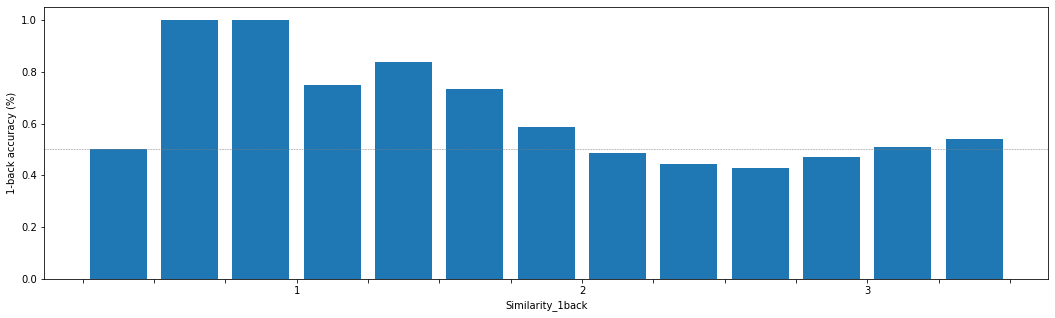

In [7]:
# PLOT 1: Similarity Barplot over all trials
y = data_per_bin_b['1back_accuracy']
x = data_per_bin_b.index
y_pos = np.arange(len(x)) -0.5
plt.figure(figsize=(18, 5))
x_labels1 = ['']*(len(x)+1)

temp = 0
numb = 0
while temp < len(x_labels1):
    x_labels1[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels1)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('Similarity_1back')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

# x-axis: -200: Previous image was very benign, 200: Previous image was very malignant
# y-axis: above 0.5 SD is apparent

### 1-Back analysis before Merging two sides

/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in long_scalars
/home/zhren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in double_scalars


<Figure size 432x288 with 0 Axes>

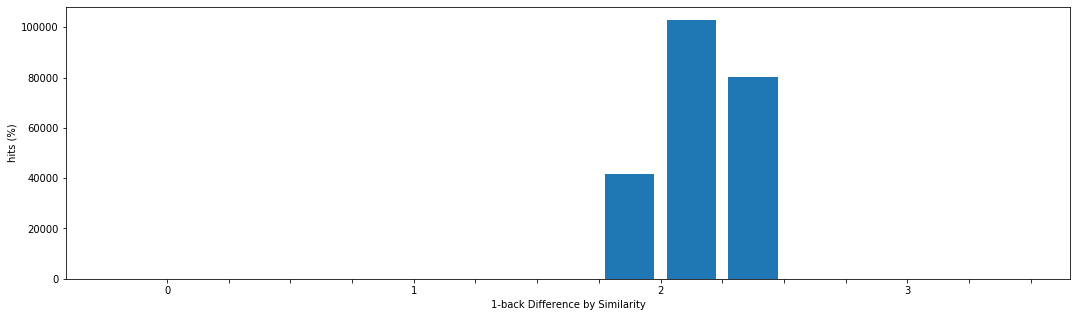

<Figure size 432x288 with 0 Axes>

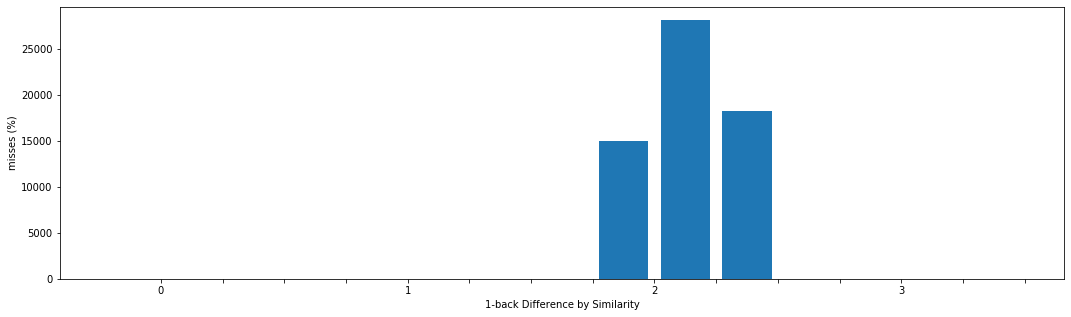

<Figure size 432x288 with 0 Axes>

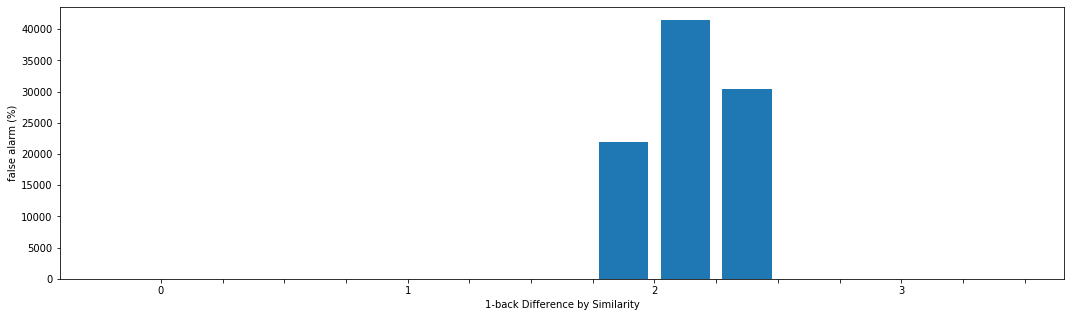

<Figure size 432x288 with 0 Axes>

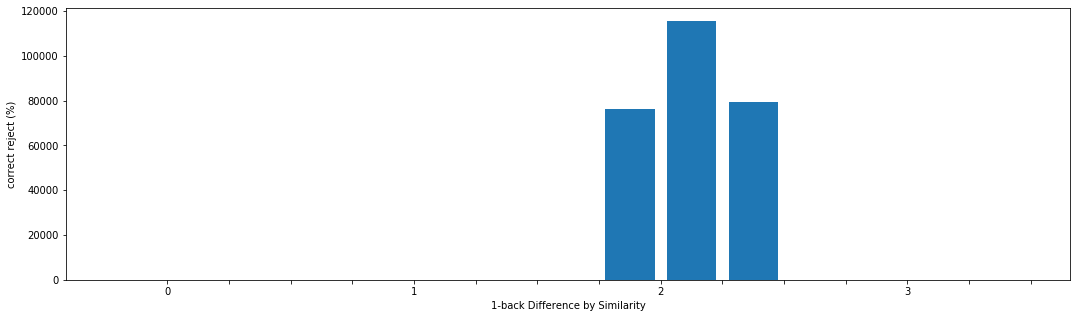

<Figure size 432x288 with 0 Axes>

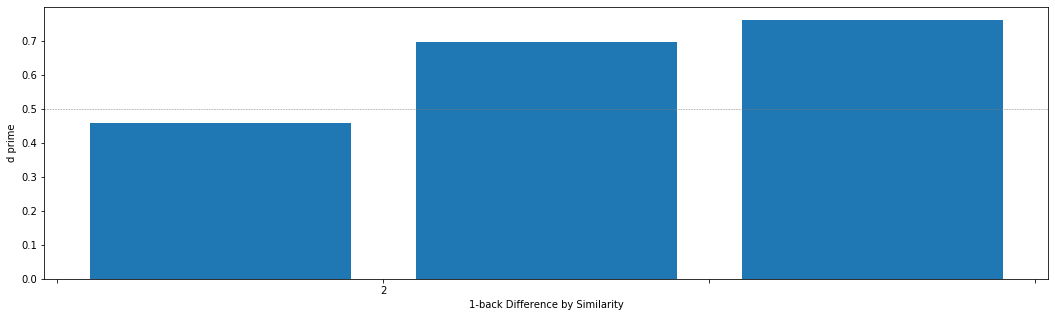

<Figure size 432x288 with 0 Axes>

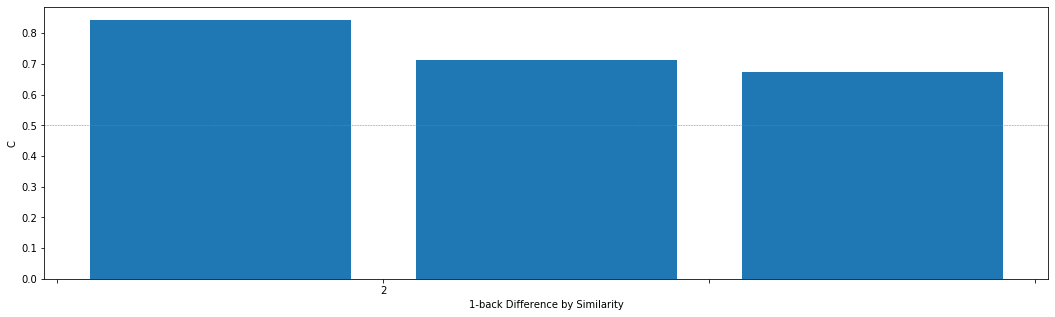

<Figure size 432x288 with 0 Axes>

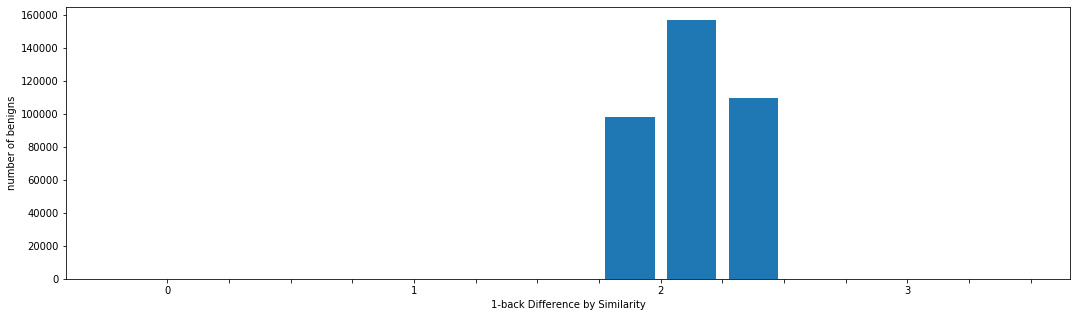

<Figure size 432x288 with 0 Axes>

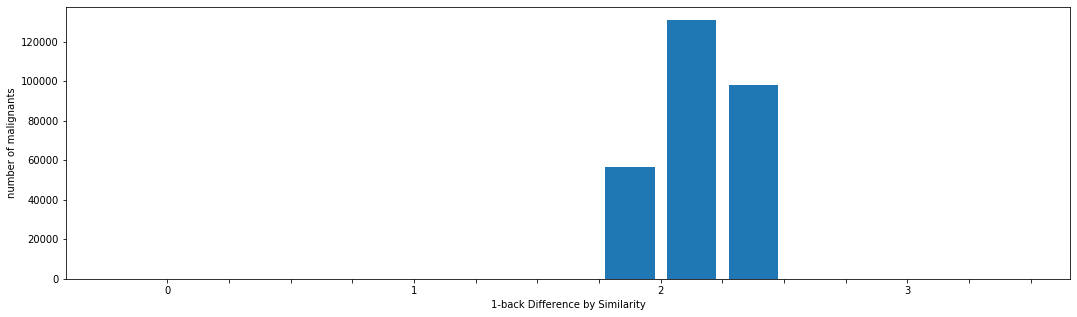

In [10]:
import scipy.stats as stats

hit_1back = []
miss_1back = []
FA_1back = []
CR_1back = []
lengths_1back = []
num_benign_1back = []
num_malignant_1back = []
# balance_rate = []
for start in np.arange(0, 0.8, 0.05):
    data_temp = data[data['similarity_bins_1back'] == pd.Interval(start, start + 0.05, closed='right')]
    lengths_1back.append(data_temp.shape[0])
#     hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lenth)
#     FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lenth)
#     miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lenth)
#     CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lenth)
    hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())

    num_benign_1back.append(FA_1back[-1] + CR_1back[-1])
    num_malignant_1back.append(hit_1back[-1] + miss_1back[-1])
#     balance_rate.append(num_malignant[-1]/num_benign[-1])
    
# PLOT 1: hits
plt.figure()
y = hit_1back[:-1]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1back[:-1]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1back[:-1]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1back[:-1]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1back_d = [stats.norm.ppf(a/c) - stats.norm.ppf(b/c) for (a,b,c) in zip(hit_1back[:-1], FA_1back[:-1], lengths_1back[:-1])]
# y_1back_d = [0 if a != a else a for a in y_1back_d]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_d)
plt.ylabel('d prime')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1back_c = [-(stats.norm.ppf(a/c) + stats.norm.ppf(b/c))/2 for (a,b,c) in zip(hit_1back[:-1], FA_1back[:-1], lengths_1back[:-1])]
# y_1back_c = [0 if a != a else a for a in y_1back_c]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_c)
plt.ylabel('C')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: benign samples
plt.figure()
y = num_benign_1back[:-1]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of benigns')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 8: malignant samples
plt.figure()
y = num_malignant_1back[:-1]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('number of malignants')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

### 1-Forward analysis before Mergeing two sides

/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_13696/1703376952.py:106: RuntimeWarning: invalid value encountered in long_scalars
  y_1forward_d = [stats.norm.ppf(a/c) - stats.norm.ppf(b/c) for (a,b,c) in zip(hit_1forward[:-1], FA_1forward[:-1], lengths_1forward[:-1])]
/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_13696/1703376952.py:106: RuntimeWarning: invalid value encountered in double_scalars
  y_1forward_d = [stats.norm.ppf(a/c) - stats.norm.ppf(b/c) for (a,b,c) in zip(hit_1forward[:-1], FA_1forward[:-1], lengths_1forward[:-1])]
/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_13696/1703376952.py:127: RuntimeWarning: invalid value encountered in long_scalars
  y_1forward_c = [-(stats.norm.ppf(a/c) + stats.norm.ppf(b/c))/2 for (a,b,c) in zip(hit_1forward[:-1], FA_1forward[:-1], lengths_1forward[:-1])]


<Figure size 432x288 with 0 Axes>

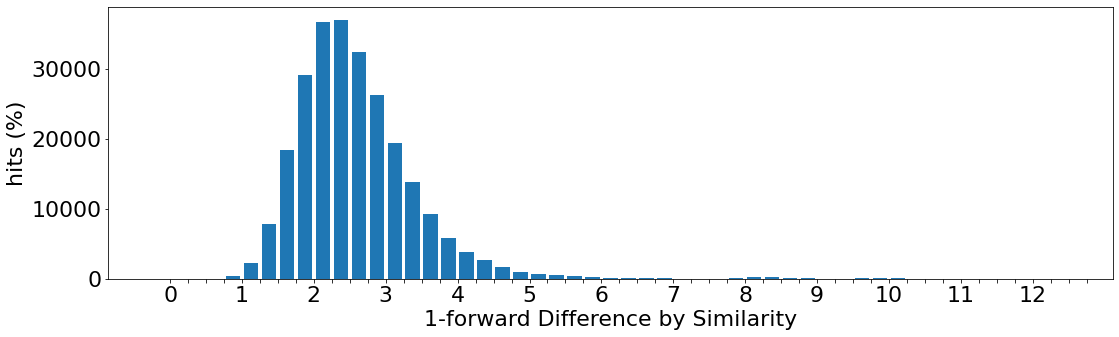

<Figure size 432x288 with 0 Axes>

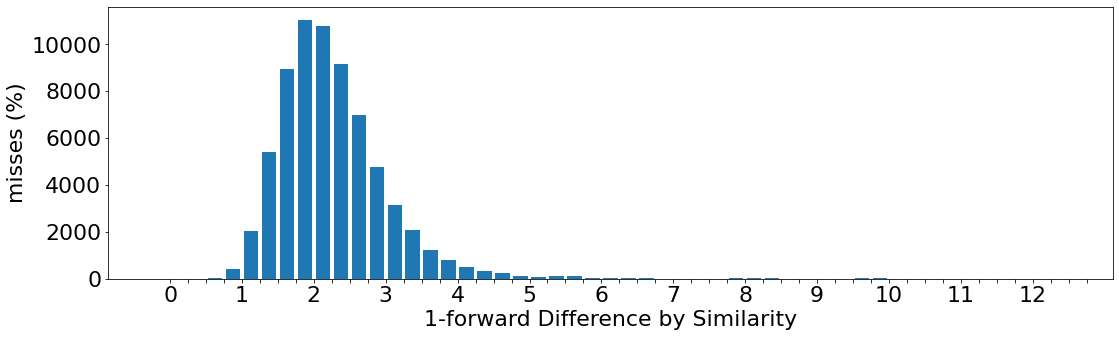

<Figure size 432x288 with 0 Axes>

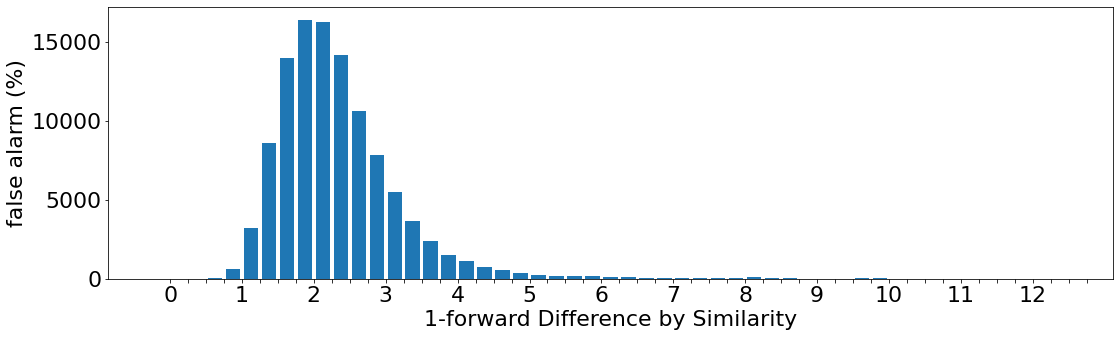

<Figure size 432x288 with 0 Axes>

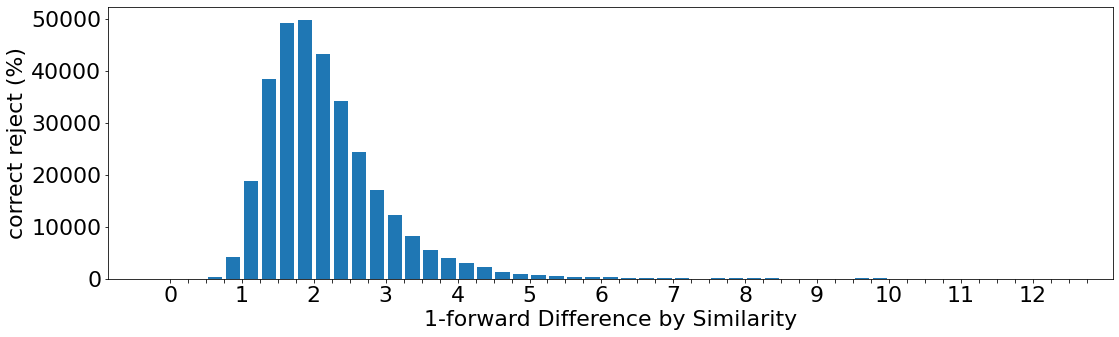

<Figure size 432x288 with 0 Axes>

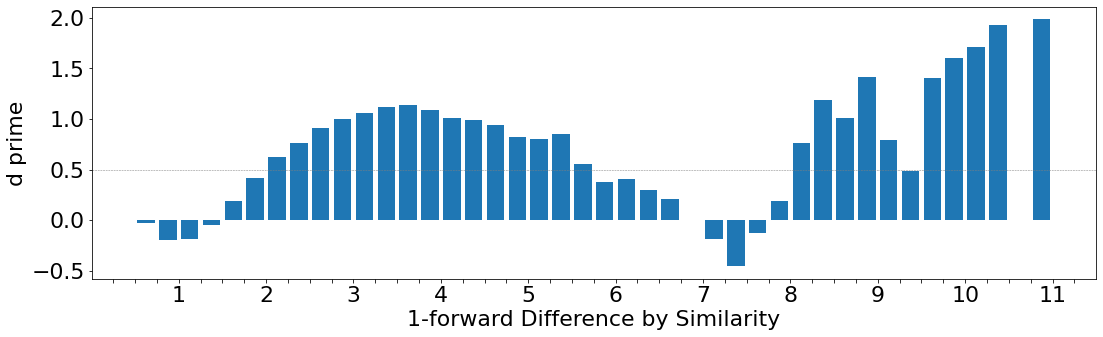

<Figure size 432x288 with 0 Axes>

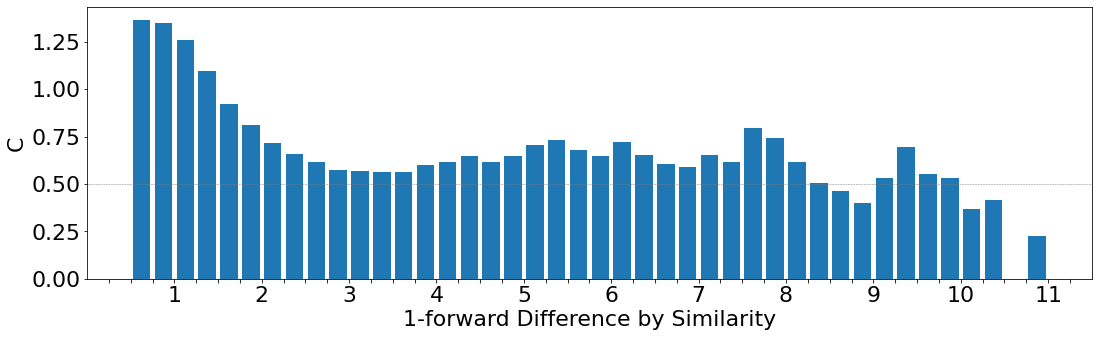

In [6]:
hit_1forward = []
miss_1forward = []
FA_1forward = []
CR_1forward = []
lengths_1forward = []

num_benign_1forward = []
num_malignant_1forward = []
for start in np.arange(0,13,0.25):
    data_temp = data[data['similarity_bins_1forward'] == pd.Interval(start, start + 0.25, closed='right')]
    lengths_1forward.append(data_temp.shape[0])
#     hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lenth)
#     FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lenth)
#     miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lenth)
#     CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lenth)
    hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    
    num_benign_1forward.append(FA_1forward[-1] + CR_1forward[-1])
    num_malignant_1forward.append(hit_1forward[-1] + miss_1forward[-1])

# PLOT 1: hits
plt.figure()
y = hit_1forward[:-1]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1forward[:-1]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1forward[:-1]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1forward[:-1]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1forward_d = [stats.norm.ppf(a/c) - stats.norm.ppf(b/c) for (a,b,c) in zip(hit_1forward[:-1], FA_1forward[:-1], lengths_1forward[:-1])]
# y_1forward_d = [0 if a != a else a for a in y_1forward_d]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_d)
plt.ylabel('d prime')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1forward_c = [-(stats.norm.ppf(a/c) + stats.norm.ppf(b/c))/2 for (a,b,c) in zip(hit_1forward[:-1], FA_1forward[:-1], lengths_1forward[:-1])]
# y_1forward_c = [0 if a != a else a for a in y_1forward_c]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_c)
plt.ylabel('C')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

### Serial Dependence on 1-back accuracy before merging

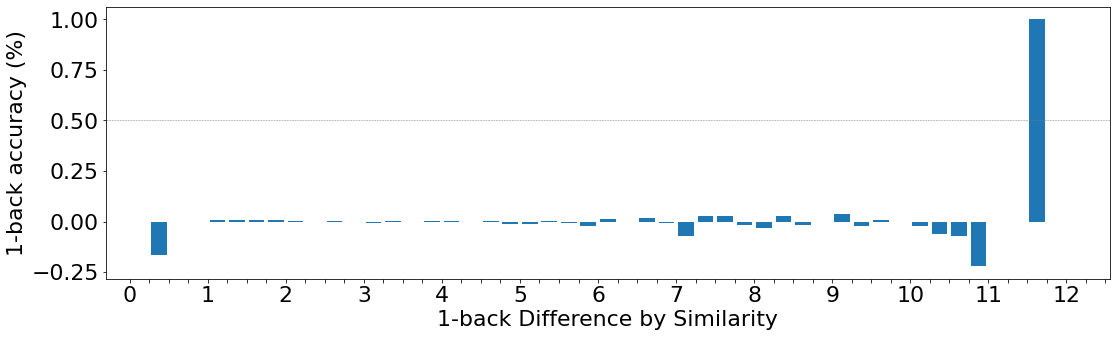

In [7]:
y = data_per_bin_b['1back_accuracy'] - data_per_bin_f['1forward_accuracy']
x = data_per_bin_f.index
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

### Serial Dependence on 1-back accuracy after merging

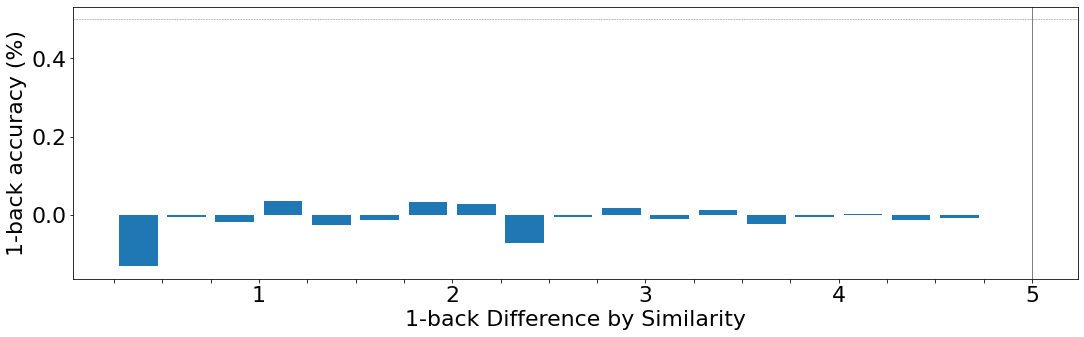

In [8]:
# y = data_per_bin['1back_accuracy'] - data_1forward_per_bin['1forward_accuracy']

y_merged = []
y = list(y)
for i in range(20):
    y_merged.append(y[i] + y[39 - i])
    
x = data_per_bin_f.index[:20]
y_pos = np.arange(len(x)) - 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_merged)
plt.ylabel('1-back accuracy (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--') #

plt.show()

In [19]:
y = [(a - b) / lenth for (a,b) in zip(hit_1back, hit_1forward)][:-1]
len(y)

51

### Serial Dependence Analysis after merging

sum of hits:-4.125341172368715e-05
sum of miss:4.12534117236873e-05
sum of FA:6.121473997708454e-05
sum of CR:-6.121473997708437e-05


/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_13696/3134749507.py:92: RuntimeWarning: invalid value encountered in double_scalars
  y = [a - b for (a,b) in zip(y_1back_d, y_1forward_d)]
/var/folders/20/y9sfd6mn6b38v_xjhfhsvs400000gn/T/ipykernel_13696/3134749507.py:112: RuntimeWarning: invalid value encountered in double_scalars
  y = [a - b for (a,b) in zip(y_1back_c, y_1forward_c)]


<Figure size 432x288 with 0 Axes>

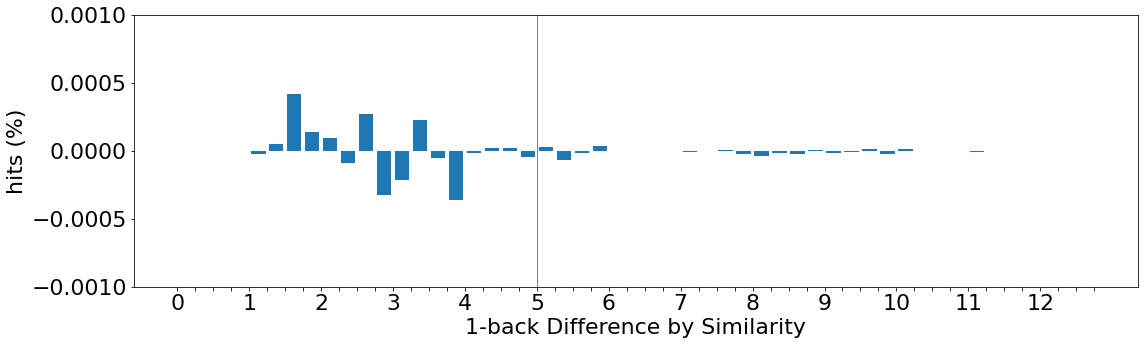

<Figure size 432x288 with 0 Axes>

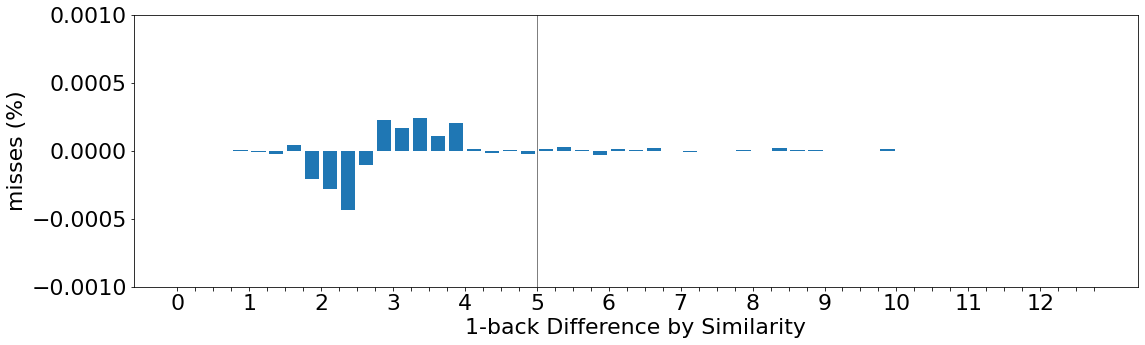

<Figure size 432x288 with 0 Axes>

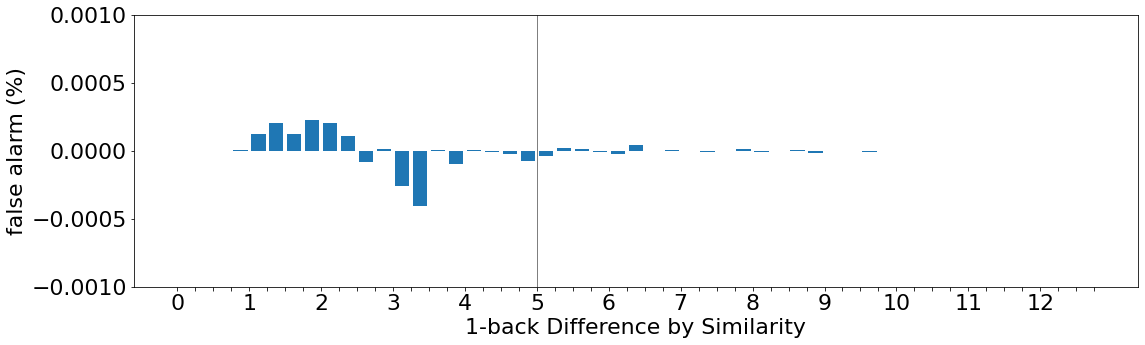

<Figure size 432x288 with 0 Axes>

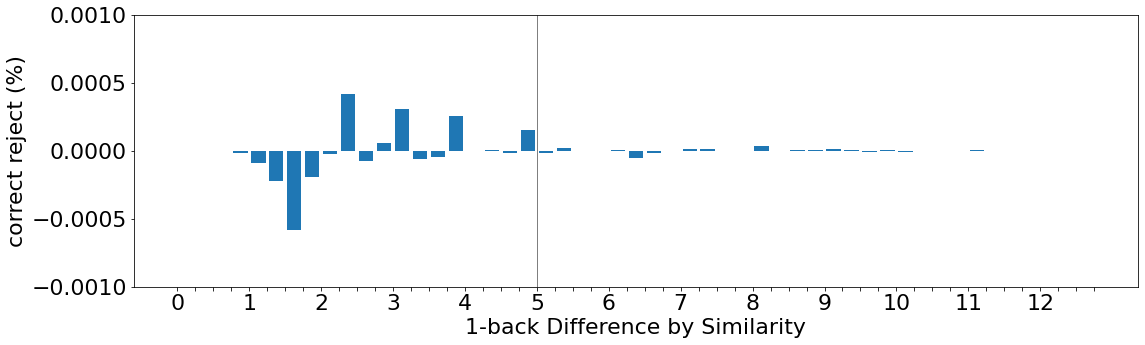

<Figure size 432x288 with 0 Axes>

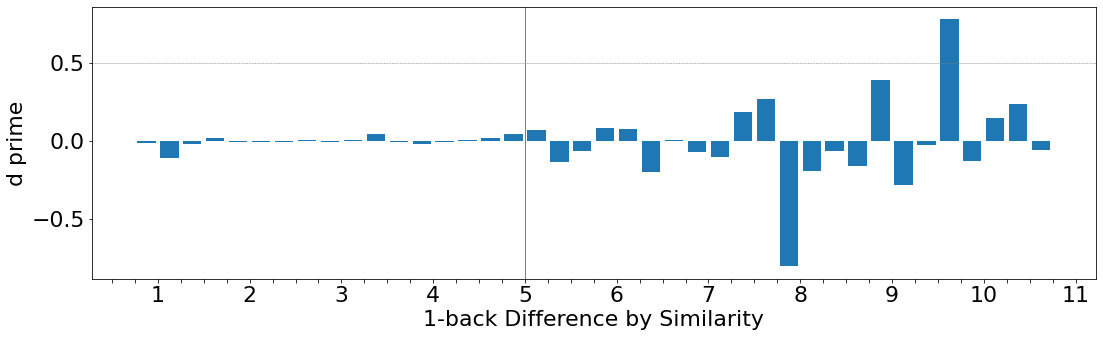

<Figure size 432x288 with 0 Axes>

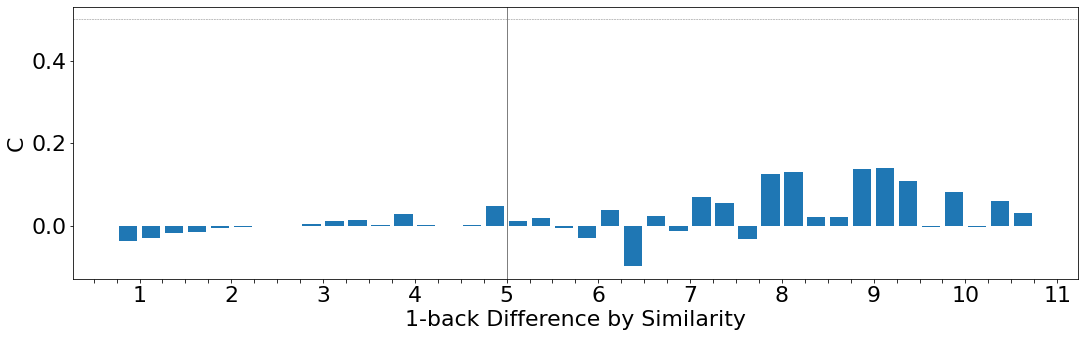

In [30]:
lenth = data.shape[0]
# PLOT 1: hits
plt.figure()
y = [(a - b) / lenth for (a,b) in zip(hit_1back, hit_1forward)][:-1]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.001, 0.001])
print('sum of hits:' + str(sum(y)))

# PLOT 2: miss
plt.figure()
y = [(a - b) / lenth for (a,b) in zip(miss_1back, miss_1forward)][:-1]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.001, 0.001])
print('sum of miss:' + str(sum(y)))

# PLOT 3: false alarm
plt.figure()
y = [(a - b) / lenth for (a,b) in zip(FA_1back, FA_1forward)][:-1]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.001, 0.001])
print('sum of FA:' + str(sum(y)))

# PLOT 4: correct reject
plt.figure()
y = [(a - b) / lenth for (a,b) in zip(CR_1back, CR_1forward)][:-1]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.001, 0.001])
print('sum of CR:' + str(sum(y)))

# PLOT 5: d'
plt.figure()
y = [a - b for (a,b) in zip(y_1back_d, y_1forward_d)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('d prime')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y = [a - b for (a,b) in zip(y_1back_c, y_1forward_c)]
x = data_per_bin_f.index
y_pos = np.arange(len(x)) + 0.5
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = numb
    temp += 4
    numb += 1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('C')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# # PLOT 7: sensitivity
# plt.figure()
# y = [a - b for (a,b) in zip(sensitivity_1back, sensitivity_1forward)][:-1]
# x = data_per_bin_f.index
# y_pos = np.arange(len(x)) + 0.5
# plt.figure(figsize=(18, 5))
# x_labels = ['']*(len(x)+1)
# temp = 0
# numb = 0
# while temp < len(x_labels):
#     x_labels[temp] = numb
#     temp += 4
#     numb += 1
# plt.xticks(np.arange(len(x)+1),x_labels)
# plt.bar(y_pos, y)
# plt.ylabel('sensitivity (%)')
# plt.xlabel('1-back Difference by Similarity')
# plt.axvline(x=20,linewidth=0.5, color='black')
# plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# # plt.ylim([-0.001, 0.001])
# print('sum of sensitivity:' + str(sum(y)))

# # PLOT 8: specificity
# plt.figure()
# y = [a - b for (a,b) in zip(specificity_1back, specificity_1forward)][:-1]
# x = data_per_bin_f.index
# y_pos = np.arange(len(x)) + 0.5
# plt.figure(figsize=(18, 5))
# x_labels = ['']*(len(x)+1)
# temp = 0
# numb = 0
# while temp < len(x_labels):
#     x_labels[temp] = numb
#     temp += 4
#     numb += 1
# plt.xticks(np.arange(len(x)+1),x_labels)
# plt.bar(y_pos, y)
# plt.ylabel('specificity (%)')
# plt.xlabel('1-back Difference by Similarity')
# plt.axvline(x=20,linewidth=0.5, color='black')
# plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# # plt.ylim([-0.001, 0.001])
# print('sum of specificity:' + str(sum(y)))

# # PLOT 9: error rate
# plt.figure()
# y = [a - b for (a,b) in zip(error_rate_1back, error_rate_1forward)][:-1]
# x = data_per_bin_f.index
# y_pos = np.arange(len(x)) + 0.5
# plt.figure(figsize=(18, 5))
# x_labels = ['']*(len(x)+1)
# temp = 0
# numb = 0
# while temp < len(x_labels):
#     x_labels[temp] = numb
#     temp += 4
#     numb += 1
# plt.xticks(np.arange(len(x)+1),x_labels)
# plt.bar(y_pos, y)
# plt.ylabel('error rate (%)')
# plt.xlabel('1-back Difference by Similarity')
# plt.axvline(x=20,linewidth=0.5, color='black')
# plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
# # plt.ylim([-0.001, 0.001])
# print('sum of error rate:' + str(sum(y)))